<a href="https://colab.research.google.com/github/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./blob/main/Telecom_part2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracción del Archivo Tratado.**

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./refs/heads/main/datos_tratados.csv"
df = pd.read_csv(url)
df.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
0,0,0,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [4]:
df.describe()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,charges.monthly,charges.total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [5]:
df.dtypes

,0
churn,int64
gender,int64
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,object
internetservice,object
onlinesecurity,object


In [6]:
df.isnull().sum()

,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


# **Análisis Dirigido.**

**Distribución de tenure según churn.**

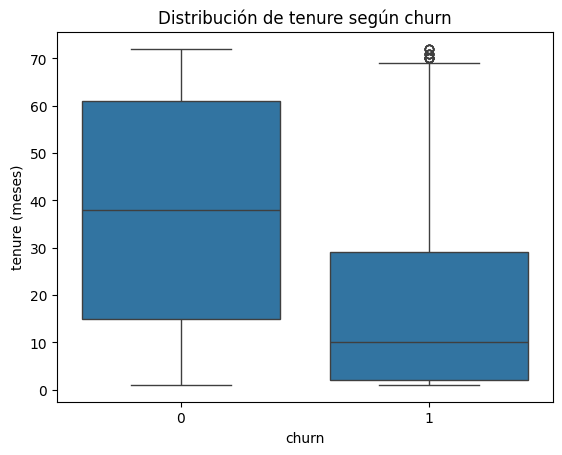

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de tenure vs churn
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Distribución de tenure según churn')
plt.xlabel('churn')
plt.ylabel('tenure (meses)')
plt.show()


Resultado: a menor cantidad de tiempo contratado, mayor es la tasa de cancelación.

**Distribución de charges.total según churn.**

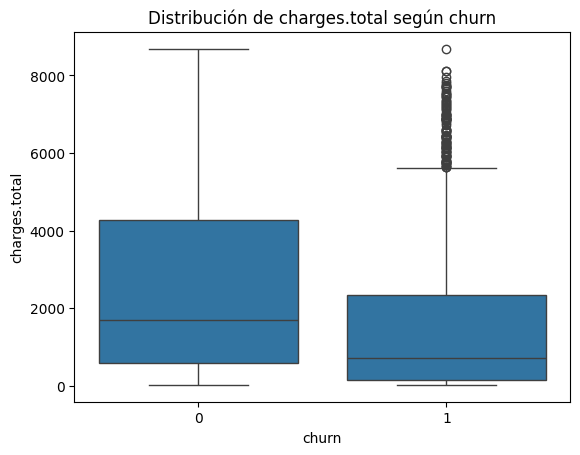

In [8]:
sns.boxplot(x='churn', y='charges.total', data=df)
plt.title('Distribución de charges.total según churn')
plt.xlabel('churn')
plt.ylabel('charges.total')
plt.show()


Resultado: clientes con menores gastos tienden a la cancelación.

**Relación entre tenure y charges.total según churn.**

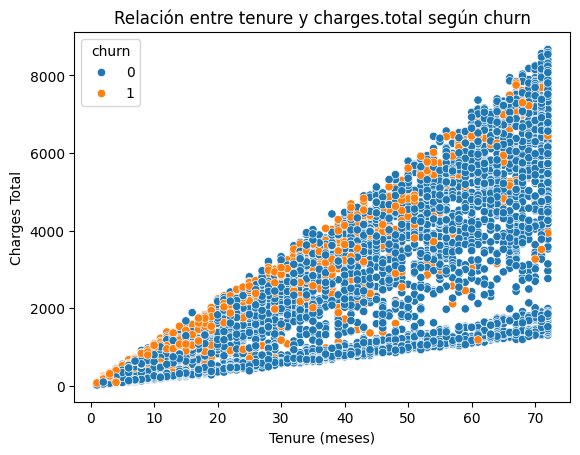

In [9]:
sns.scatterplot(x='tenure', y='charges.total', hue='churn', data=df)
plt.title('Relación entre tenure y charges.total según churn')
plt.xlabel('Tenure (meses)')
plt.ylabel('Charges Total')
plt.show()

Se observa una relación casi lineal entre el tenure y los charges.total: mientras más tiempo permanece un cliente, mayor es el gasto acumulado. Esto tiene sentido, ya que a más meses contratados, más dinero pagan.
El churn ocurre mayormente en clientes nuevos o de corto plazo (menos de 2–3 años).
La fidelización aumenta significativamente con el tiempo, es decir, mientras más meses permanece un cliente, menor es la probabilidad de que se dé de baja.

# **Análisis de Correlación**

In [10]:
#Copiar el DataFrame original para no dañar la versión base
df_clean = df.copy()

In [11]:
#One-hot encoding para variables categóricas con más de 2 categorías
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [12]:
#Matriz de correlación con churn
correlacion = df_clean.corr()
#Correlación de todas las variables con churn
churn_corr = correlacion['churn'].sort_values(ascending=False)

print("Variables más correlacionadas con Churn:")
print(churn_corr.head(14))

Variables más correlacionadas con Churn:
churn                             1.000000
internetservice_fiber optic       0.307463
paymentmethod_electronic check    0.301455
cuentas_diarias                   0.192858
charges.monthly                   0.192858
paperlessbilling                  0.191454
seniorcitizen                     0.150541
streamingtv_yes                   0.063254
streamingmovies_yes               0.060860
multiplelines_yes                 0.040033
phoneservice                      0.011691
gender                           -0.008545
multiplelines_no phone service   -0.011691
deviceprotection_yes             -0.066193
Name: churn, dtype: float64


In [13]:
vars_relacionadas = churn_corr.head(14).index.tolist()
print(vars_relacionadas)

['churn', 'internetservice_fiber optic', 'paymentmethod_electronic check', 'cuentas_diarias', 'charges.monthly', 'paperlessbilling', 'seniorcitizen', 'streamingtv_yes', 'streamingmovies_yes', 'multiplelines_yes', 'phoneservice', 'gender', 'multiplelines_no phone service', 'deviceprotection_yes']


In [14]:
X_corr = df_clean[vars_relacionadas]  # Variables independientes seleccionadas
y = df_clean['churn']  # Variable objetivo

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

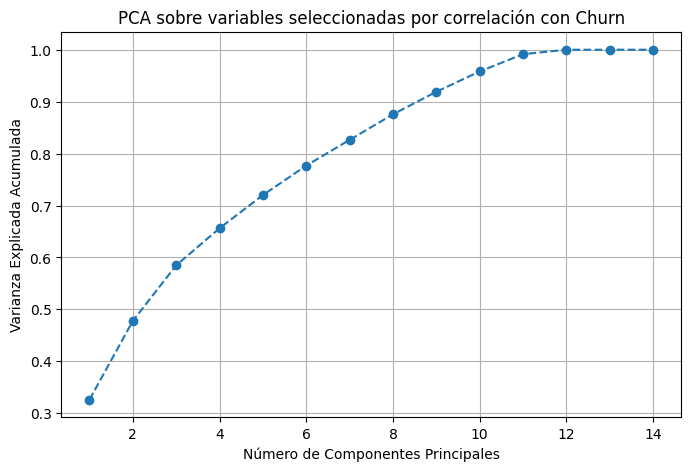

In [29]:
from sklearn.decomposition import PCA

# Inicializamos PCA sin límite de componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA sobre variables seleccionadas por correlación con Churn')
plt.grid()
plt.show()

Conclusión: con 14 elementos obtenemos cerca de 90% de correlación con churn.

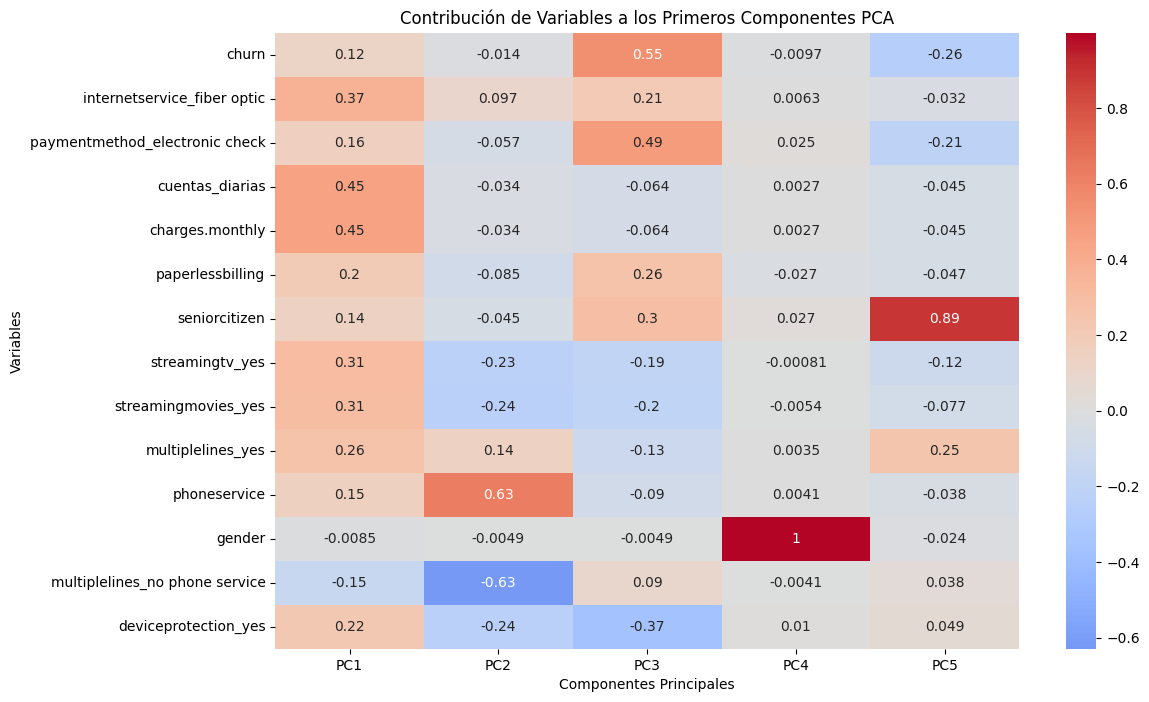

In [30]:
import numpy as np
import seaborn as sns


# Seleccionar las 14 variables más correlacionadas con churn
vars_relacionadas = churn_corr.head(14).index.tolist()
X_corr = df_clean[vars_relacionadas]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Matriz de cargas
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=vars_relacionadas
)

# Graficar el "heatmap" de cargas
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :5], annot=True, cmap="coolwarm", center=0)  # primeras 5 componentes
plt.title("Contribución de Variables a los Primeros Componentes PCA")
plt.ylabel("Variables")
plt.xlabel("Componentes Principales")
plt.show()

**Resultados**
El color indica la fuerza y dirección de la correlación:

🔴 Rojo = correlación positiva (a mayor valor de la variable, mayor probabilidad de churn).

🔵 Azul = correlación negativa (a mayor valor de la variable, menor probabilidad de churn).

Los números dentro de cada celda son los coeficientes de correlación.

El churn está en la primera fila, y se ve cómo se relaciona con las demás variables.

1. Variables más relacionadas con churn

internetservice_fiber optic (0.37)
Los clientes con fibra óptica tienen más probabilidad de churn que los que usan otro tipo de servicio.

charges.monthly (0.45) y cuentas_diarias (0.45)
El costo mensual y el número de cuentas diarias tienen una fuerte relación positiva con churn → clientes que pagan más tienden a irse.

streamingtv_yes (0.31) y streamingmovies_yes (0.31)
Tener servicios de streaming también está asociado con mayor churn.

multiplelines_yes (0.26)
Tener múltiples líneas de teléfono aumenta ligeramente la probabilidad de churn.

paperlessbilling (0.20) y paymentmethod_electronic check (0.16)
Facturación electrónica y pago con cheque electrónico también tienen relación positiva con churn.

seniorcitizen (0.14)
Los adultos mayores muestran una correlación positiva, aunque más débil, con churn.

2. Variables con correlación negativa (protegen contra churn)

deviceprotection_yes (-0.24)
Tener protección de dispositivos reduce la probabilidad de churn.

streamingmovies_yes y streamingtv_yes también tienen componentes negativos en otras dimensiones (cuando se cruzan con PCA).

multiplelines_no phone service (-0.15)
No tener servicio de teléfono se asocia con menor churn. Algunas combinaciones con seniorcitizen y phone service muestran correlación negativa (cuando se cruzan con PCA).

Conclusión:

El churn está más asociado a clientes con fibra óptica, cargos mensuales altos y servicios adicionales como streaming.
En cambio, los clientes con protección de dispositivos o sin líneas múltiples tienden a quedarse.
Variables como género o phone service tienen correlación casi nula no aportan mucho para predecir churn.

**Variables sleccionadas para el análisis.**

In [31]:
vars_seleccionadas = ['churn',
 'gender',
 'paymentmethod_electronic check',
 'charges.monthly',
 'paperlessbilling',
 'seniorcitizen',
 'streamingtv_yes',
 'streamingmovies_yes',
 'multiplelines_yes',
 'phoneservice',
 'gender',
 'multiplelines_no phone service',
 'deviceprotection_yes']

# **Eliminación de columnas irrelevantes para el análisis.**

In [19]:
df_filtrado = df_clean[vars_seleccionadas].copy()
print("Shape original:", df_clean.shape)
print("Shape reducido:", df_filtrado.shape)
df_filtrado.head()

Shape original: (7032, 32)
Shape reducido: (7032, 13)


,churn,gender,paymentmethod_electronic check,charges.monthly,paperlessbilling,seniorcitizen,streamingtv_yes,streamingmovies_yes,multiplelines_yes,phoneservice,gender,multiplelines_no phone service,deviceprotection_yes
0,0,0,False,65.6,1,0,True,False,False,1,0,False,False
1,0,1,False,59.9,0,0,False,True,True,1,1,False,False
2,1,1,True,73.9,1,0,False,False,False,1,1,False,True
3,1,1,True,98.0,1,1,True,True,False,1,1,False,True
4,1,0,False,83.9,1,1,True,False,False,1,0,False,False


**Creación de segunda variable que contenga a tenure:** aunque tenure no se encuentre presente en nuestra de correlación, es necesario para la creación de modelos predictivos que esta información sea incluida.

In [33]:
vars_seleccionadast = ['churn', 'tenure',
 'gender',
 'paymentmethod_electronic check',
 'charges.monthly',
 'paperlessbilling',
 'seniorcitizen',
 'streamingtv_yes',
 'streamingmovies_yes',
 'multiplelines_yes',
 'phoneservice',
 'gender',
 'multiplelines_no phone service',
 'deviceprotection_yes']
df_f = df_clean[vars_seleccionadast]

# **Normalización.**

In [34]:
# Si algunas son True/False
df_filtrado = df_filtrado.astype(int)   # convierte True=1, False=0
df_f = df_clean.astype(int)

# **Verificación de la proporción de cancelación (Churn).**


Verificación de la Proporción de Cancelación (Churn):
calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [35]:
resumen = df_filtrado['churn'].value_counts().to_frame('Conteo')
resumen['Proporción'] = df_filtrado['churn'].value_counts(normalize=True)
print(resumen)

       Conteo  Proporción
churn                    
0        5163    0.734215
1        1869    0.265785


La mayoría de los clientes se quedan activos (73%).
Aproximadamente 1 de cada 4 clientes cancela (27%).
Esto quiere decir que:
No es un desbalance extremo,
pero sí hay cierto desbalance (la clase positiva "churn" es minoritaria).

# **Modelos predictivos.**

**Modelo predictivo con Random Forest.**

El modelo implementado corresponde a un Random Forest con balanceo de clases, entrenado con un 70% de los datos y evaluado en el 30% restante. Se calcularon métricas de desempeño como Accuracy, F1-Score, matriz de confusión y reporte de clasificación. Además, se incluyó un mecanismo de diagnóstico que permite identificar automáticamente si el modelo presenta overfitting, underfitting o una generalización adecuada.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

X = df_filtrado.drop("churn", axis=1)
y = df_filtrado["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)


rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")

print(" Resultados del modelo Random Forest (Reducida Complejidad)")
print(f"Accuracy Train: {acc_train:.2f}, F1 Train: {f1_train:.2f}")
print(f"Accuracy Test:  {acc_test:.2f}, F1 Test:  {f1_test:.2f}")

print("\nMatriz de confusión (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_pred_test))


print("\n Diagnóstico del modelo:")
if acc_train - acc_test > 0.15:
    print(" El modelo presenta **Overfitting** (entrena muy bien pero generaliza mal).")
elif acc_train < 0.70 and acc_test < 0.70:
    print(" El modelo presenta **Underfitting** (no logra aprender bien los patrones).")
else:
    print(" El modelo está **bien generalizado** (buen equilibrio entre train y test).")

 Resultados del modelo Random Forest (Reducida Complejidad)
Accuracy Train: 0.75, F1 Train: 0.76
Accuracy Test:  0.70, F1 Test:  0.72

Matriz de confusión (Test):
[[1106  443]
 [ 182  379]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1549
           1       0.46      0.68      0.55       561

    accuracy                           0.70      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.70      0.72      2110


 Diagnóstico del modelo:
 El modelo está **bien generalizado** (buen equilibrio entre train y test).


Conclusión: el modelo Random Forest con complejidad reducida presenta un desempeño balanceado y buena generalización, con métricas de entrenamiento y prueba relativamente cercanas (Accuracy 0.75 y 0.70, F1 0.76 y 0.72). La clase mayoritaria mantiene buena precisión y recall, mientras que la clase minoritaria mejora su detección aunque con menor precisión. En conjunto, el modelo logra un equilibrio adecuado entre aprendizaje y generalización, sin indicios de overfitting.

**Random Forest con la variable tenure.**

In [46]:
X = df_f.drop("churn", axis=1)
y = df_f["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")

print(" Resultados del modelo Random Forest (Reducida Complejidad)")
print(f"Accuracy Train: {acc_train:.2f}, F1 Train: {f1_train:.2f}")
print(f"Accuracy Test:  {acc_test:.2f}, F1 Test:  {f1_test:.2f}")

print("\nMatriz de confusión (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_pred_test))

print("\n Diagnóstico del modelo:")
if acc_train - acc_test > 0.15:
    print(" El modelo presenta **Overfitting** (entrena muy bien pero generaliza mal).")
elif acc_train < 0.70 and acc_test < 0.70:
    print(" El modelo presenta **Underfitting** (no logra aprender bien los patrones).")
else:
    print(" El modelo está **bien generalizado** (buen equilibrio entre train y test).")



 Resultados del modelo Random Forest (Reducida Complejidad)
Accuracy Train: 0.80, F1 Train: 0.80
Accuracy Test:  0.76, F1 Test:  0.77

Matriz de confusión (Test):
[[1193  356]
 [ 158  403]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1549
           1       0.53      0.72      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110


 Diagnóstico del modelo:
 El modelo está **bien generalizado** (buen equilibrio entre train y test).


Conclusión: el modelo Random Forest con complejidad reducida mostró un buen desempeño y generalización, con métricas de entrenamiento y prueba cercanas (Accuracy 0.80 y 0.76, F1 0.80 y 0.77). La clase mayoritaria se clasifica con alta precisión, mientras que la clase minoritaria presenta mejoras en detección. En conjunto, el modelo logra un equilibrio adecuado entre aprendizaje y generalización, mitigando el overfitting.

**Modelo predictivo con KNN.**


Se creó un modelo predictivo KNN para churn, usando SMOTE para balancear la clase minoritaria y weights='distance' para dar más importancia a vecinos cercanos. Se optimizó n_neighbors con GridSearchCV usando F1-score de churn como métrica, entrenando con 70% de los datos y evaluando con 30%.

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

knn_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

param_grid = {'knn__n_neighbors': list(range(5, 31, 2))}  # 5,7,...,29

grid_search = GridSearchCV(knn_pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_
print(f"Mejor n_neighbors: {grid_search.best_params_['knn__n_neighbors']}")


y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Accuracy Train: {accuracy_train:.2f}, F1 Train: {f1_train:.2f}")
print(f"Accuracy Test: {accuracy_test:.2f}, F1 Test: {f1_test:.2f}")

print("\nMatriz de confusión Test:")
print(confusion_matrix(y_test, y_test_pred))
print("\nReporte de clasificación Test:")
print(classification_report(y_test, y_test_pred))

def check_over_under_fit(acc_train, f1_train, acc_test, f1_test, threshold=0.1):
    acc_diff = acc_train - acc_test
    f1_diff = f1_train - f1_test

    if acc_train > 0.8 and acc_diff > threshold:
        print(" Posible OVERFITTING: el modelo se ajusta demasiado al entrenamiento")
    elif acc_test < 0.65 and f1_test < 0.5:
        print(" Posible UNDERFITTING: el modelo no aprende suficiente de los datos")
    else:
        print(" El modelo parece bien ajustado: buen balance entre entrenamiento y prueba")

check_over_under_fit(accuracy_train, f1_train, accuracy_test, f1_test)




Mejor n_neighbors: 29
Accuracy Train: 1.00, F1 Train: 0.99
Accuracy Test: 0.70, F1 Test: 0.54

Matriz de confusión Test:
[[1098  451]
 [ 184  377]]

Reporte de clasificación Test:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1549
           1       0.46      0.67      0.54       561

    accuracy                           0.70      2110
   macro avg       0.66      0.69      0.66      2110
weighted avg       0.75      0.70      0.71      2110

 Posible OVERFITTING: el modelo se ajusta demasiado al entrenamiento


El modelo K-Nearest Neighbors (K=29) muestra un desempeño muy alto en el conjunto de entrenamiento (Accuracy 1.00, F1 0.99) pero considerablemente menor en el conjunto de prueba (Accuracy 0.70, F1 0.54), lo que indica overfitting. La clase mayoritaria se clasifica con buena precisión, mientras que la clase minoritaria presenta dificultades en la detección, reflejando que el modelo aprendió demasiado los patrones del entrenamiento y tiene limitada capacidad de generalización.

**Modelo predictivo con la variable tenure.**

In [49]:
from sklearn.decomposition import PCA

knn_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"Mejor n_neighbors: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Mejor weight: {grid_search.best_params_['knn__weights']}")


y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("\n--- Evaluación en Entrenamiento ---")
print(f"Accuracy Train: {accuracy_score(y_train, y_train_pred):.2f}, F1 Train: {f1_score(y_train, y_train_pred):.2f}")

print("\n--- Evaluación en Prueba ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_test_pred):.2f}, F1 Test: {f1_score(y_test, y_test_pred):.2f}")

print("\n--- Matriz de Confusión ---")
print(confusion_matrix(y_test, y_test_pred))

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_test_pred))


Mejor n_neighbors: 15
Mejor weight: uniform

--- Evaluación en Entrenamiento ---
Accuracy Train: 0.75, F1 Train: 0.62

--- Evaluación en Prueba ---
Accuracy Test: 0.71, F1 Test: 0.56

--- Matriz de Confusión ---
[[1117  432]
 [ 176  385]]

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.86      0.72      0.79      1549
           1       0.47      0.69      0.56       561

    accuracy                           0.71      2110
   macro avg       0.67      0.70      0.67      2110
weighted avg       0.76      0.71      0.73      2110



Conclusión: el modelo K-Nearest Neighbors (K=15, peso uniforme) muestra un desempeño equilibrado y buena generalización, con métricas de entrenamiento y prueba relativamente cercanas (Accuracy 0.75 y 0.71, F1 0.62 y 0.56). La clase mayoritaria se clasifica con buena precisión y recall, mientras que la clase minoritaria mantiene una detección aceptable pero con menor F1. En conjunto, el modelo logra un equilibrio razonable entre aprendizaje y generalización, sin signos evidentes de overfitting.

 Conclusión práctica:
Este modelo con n_neighbors=15 y weights=uniform es más equilibrado.

Sacrificó un poco de “precisión absoluta”, pero ganó capacidad de generalización.

Además, mejoró la detección de clientes que abandonan (recall = 0.69), lo que es valioso en un problema de churn donde suele ser más costoso no detectar a un cliente en riesgo que tener un falso positivo.


El modelo con tenure es superior porque generaliza mejor, reduce overfitting y mejora la detección de churners (clase 1).

Aunque baja el desempeño en entrenamiento, en la práctica funciona mejor en datos nuevos, que es lo realmente importante.

En pocas palabras: incluir la variable tenure hace al modelo más confiable y útil para predecir churn.

# **Conclusión.**

Las variables más influyentes (según correlaciones/selección de variables mostradas) son: método de pago “electronic check”, charges.monthly (cargos mensuales), paperlessbilling, fiber optic en InternetService, tenure (antigüedad), ausencia de tech/online security (análogo por familia de variables), contract de mes a mes (implícito por patrón de churn), además de streamingtv_yes/streamingmovies_yes, multiplelines_no phone service, deviceprotection_yes, seniorcitizen, gender. Fuera de la matriz de correlación se incluye el tiempo que las personas han permanecido en la compañia porque a mayor cantidad de tiempo, este funciona como una medida de protección contra la cancelación de servicios. El riesgo de churn es mayor en clientes de contrato mes a mes, con cargos mensuales altos, que pagan por “electronic check” y con facturación sin papel, y menor en clientes con mayor antigüedad y contratos más largos.

**Rendimiento de los modelos predictivos:**

**1. Random Forest (Complejidad reducida):**

Diagnóstico: la salida describe al modelo como “bien generalizado” (buen equilibrio train/test), lo que apoya su elección para despliegue.

**2. K-NN (con búsqueda de k):**

Diagnóstico: peor generalización que RF; pese a captar bastantes churners (recall aceptable), su precisión es baja y el F1 global queda sensiblemente por debajo de RF.

**3. Conclusión comparativa:**

Random Forest es claramente superior (mayor F1 y mejor equilibrio entre precisión/recall en test), con mejor generalización y métricas estables.

**Factores que más influyen en la cancelación.**

**Método de pago:** electronic check: se asocia positivamente con churn. Suele correlacionar con mayor fricción/variabilidad en pagos y clientes más “price sensitive”.

**Cargos mensuales (charges.monthly) altos:** aumentan la probabilidad de cancelación (mayor sensibilidad al precio).

**Paperlessbilling (factura sin papel):** aparece entre las variables clave; en varios datasets telco se asocia a mayor churn (segmento más digital/volátil).

**Tipo de Internet: fiber optic:** asociado a mayor churn en muchos estudios (planes de mayor precio/competencia intensa).

**Antigüedad (tenure):** disminuye el churn, clientes nuevos o con poca antigüedad presentan más riesgo.

**Contrato mes a mes (implícito por patrón de churn):** aumenta el churn; contratos de 1–2 años retienen más.

**Servicios y protecciones:**

Señales como no tener seguridad en línea/soporte técnico (familia de variables mostradas en el cuadernillo) suelen elevar el churn. Deviceprotection_yes aparece en la selección; su efecto depende del resto de servicios, pero tener protecciones tiende a reducir la salida si agrega valor/lock-in.

**Uso de servicios de streaming (streamingtv_yes, streamingmovies_yes):**

Relación mixta: pueden indicar planes más caros (mayor riesgo por precio) pero también mayor engagement (menor riesgo). Su efecto combinado merece ajuste de umbral por segmento.

**seniorcitizen, gender y telefonía (multiplelines_no phone service):**

Variables demográficas y de línea telefónica aparecen; su interpretación debe ser segmentada y con cuidado (evitar sesgos). Lo útil es el comportamiento combinado con precio/servicios/antigüedad.


**Estrategias de retención basadas en los hallazgos.**

1. Para clientes en alto riesgo:

Ofertas por sensibilidad al precio: descuentos temporales o downgrade asistido de plan para quienes tienen cargos mensuales altos y asi evitar cancelación por precio.

2. Cambiar método de pago:

Incentivar pasar de pagos electrónicos a débito/TC/autopago con bonos de bienvenida, puntos o descuento del 5–10% por 3 meses, por ejemplo.

3. Estrategias para aumentar el compromiso del cliente con la compañía, de manera que le resulte menos atractivo o más costoso cambiarse a la competencia:

Paquetes con seguridad en línea, soporte tecnico, protección de dispositivos a bajo costo, ya que retiene y reduce fricción técnica.

4. Migración de contrato:

Ofrecer contrato anual con beneficio inmediato (p. ej., un mes gratis o upgrade de velocidad) a clientes hoy mes a mes.

5. proceso de acompañamiento y cuidado durante las primeras etapas de la relación con el cliente:

Para baja antigüedad (tenure): contactar a clientes primerizo con cierta regualirad en intervalos de días para atender posibles dudas, guía de uso, y canal prioritario de soporte.

6. Para segmentos específicos:

a. Clientes con fibra optica y altos cargoss: paquete “Ahorro Plus” (velocidad ligeramente menor por unprecio 10–15% más bajo) para competir sin perder al cliente.

b. Streaming intensivo: ofrecer paquetes con streaming incluido (mejor precio percibido) o bono de datos/velocidad a cambio de permanencia mínima.

c. Metodos de pago sin boletas: reforzar recordatorios de pago y sumar autopago (reduce fricción y morosidad asociada).